<a href="https://colab.research.google.com/github/gcbirat12/All_Projects/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

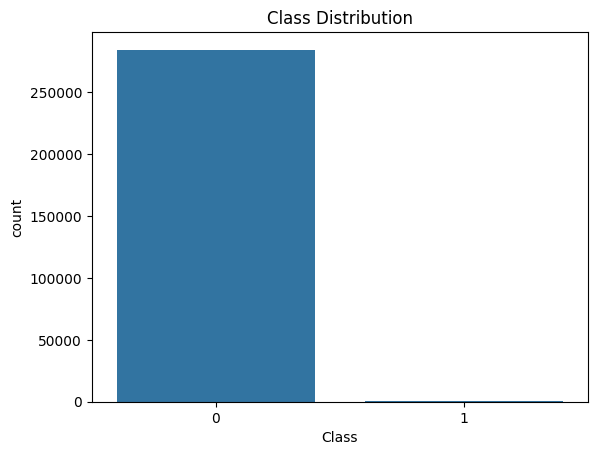

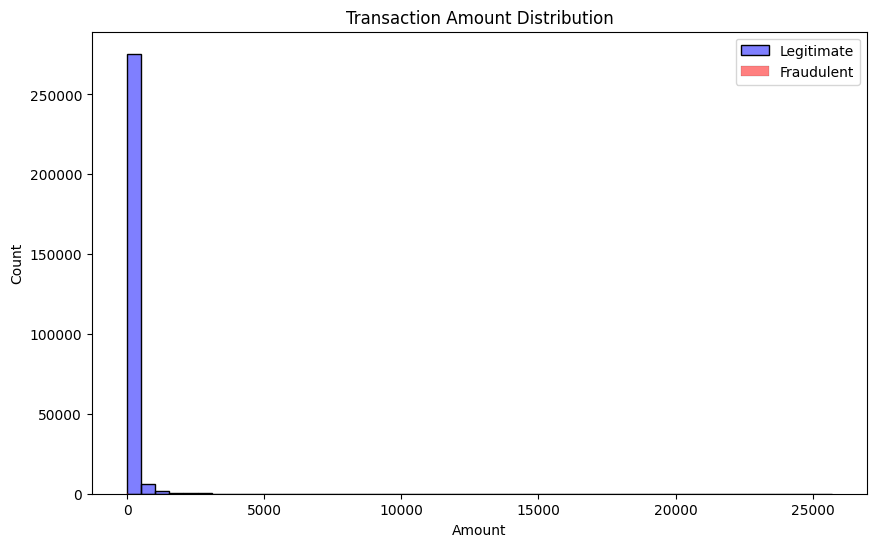

Accuracy: 0.9991222218320986
Confusion Matrix:
 [[56855     9]
 [   41    57]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Prediction for the new observation: Fraudulent


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

# Load the dataset (Make sure to upload the dataset to your Colab session first)
data = pd.read_csv('/content/drive/My Drive/Fraud_Detection/creditcard.csv')

# Exploratory Data Analysis (EDA)
print(data.head())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Checking for imbalance in the dataset
print(data['Class'].value_counts(normalize=True))

# Visualizing the class imbalance
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Distribution of transaction amounts by class
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='blue', alpha=0.5, label='Legitimate')
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='red', alpha=0.5, label='Fraudulent')
plt.title('Transaction Amount Distribution')
plt.legend()
plt.show()

# Data Preprocessing
# Standardizing the 'Amount' feature
data['NormalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Splitting the dataset into training and testing sets
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
print('Accuracy:', accuracy_score(y_test, predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))
print('Classification Report:\n', classification_report(y_test, predictions))

# Saving the model for deployment
joblib.dump(model, '/content/credit_card_fraud_detection_model.pkl')

# Example of loading and using the model
model_loaded = joblib.load('/content/credit_card_fraud_detection_model.pkl')
new_observation = X_test.iloc[0].values.reshape(1, -1)
prediction = model_loaded.predict(new_observation)
print('Prediction for the new observation:', 'Fraudulent' if prediction[0] == 1 else 'Legitimate')


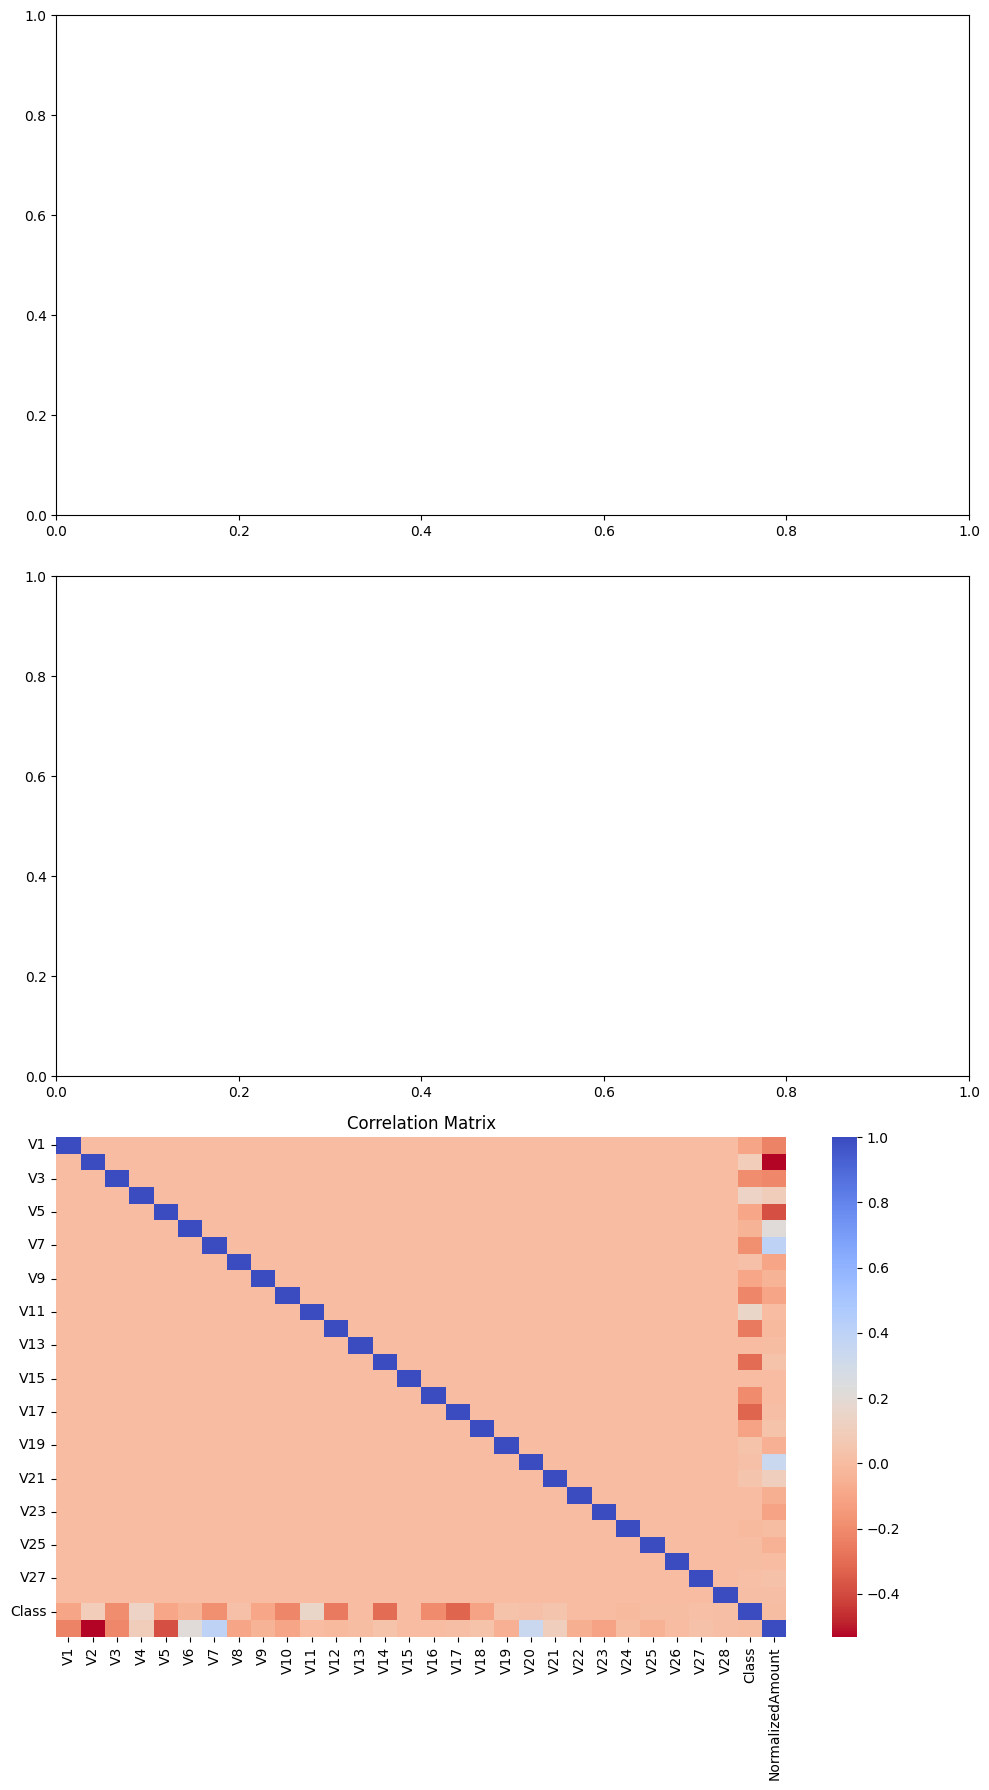

In [8]:
# Setting up the figure for multiple plots
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Correlation Matrix
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', ax=axs[2])
axs[2].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()